In [211]:
import pandas as pd
from player import Player
from ratingscraper import *
from scorescraper import *
from estimation import *
from simulations import *
from tournament import Tournament, Cup, WorldCup
%matplotlib inline

## Generate players

In [156]:
df = pd.read_csv('wcplayers.csv')

In [157]:
df

,﻿Player,FideId
0,Maxime Vachier-Lagrave,623539
1,Levon Aronian,13300474
2,Wesley So,5202213
3,Ding Liren,8603677


In [158]:
players = []
for x in df.iterrows():
    row = x[1]
    players.append(Player(name=row[0], fide_id=row[1]))

## Web scraping

In [159]:
scrape_ratings(players)

In [160]:
players

[Maxime Vachier-Lagrave (2804),
 Levon Aronian (2802),
 Wesley So (2792),
 Ding Liren (2771)]

In [161]:
playerdict = {player.name: player for player in players}

In [162]:
scrape_scores(players)

Fetching head-to-head score between Maxime Vachier-Lagrave and Maxime Vachier-Lagrave
Fetching head-to-head score between Maxime Vachier-Lagrave and Levon Aronian
Fetching head-to-head score between Maxime Vachier-Lagrave and Wesley So
Fetching head-to-head score between Maxime Vachier-Lagrave and Ding Liren
Fetching head-to-head score between Levon Aronian and Maxime Vachier-Lagrave
Fetching head-to-head score between Levon Aronian and Levon Aronian
Fetching head-to-head score between Levon Aronian and Wesley So
Fetching head-to-head score between Levon Aronian and Ding Liren
Fetching head-to-head score between Wesley So and Maxime Vachier-Lagrave
Fetching head-to-head score between Wesley So and Levon Aronian
Fetching head-to-head score between Wesley So and Wesley So
Fetching head-to-head score between Wesley So and Ding Liren
Fetching head-to-head score between Ding Liren and Maxime Vachier-Lagrave
Fetching head-to-head score between Ding Liren and Levon Aronian
Fetching head-to-he

The scrape_scores() function takes a while to run, because it has to send a request to chessgames.com's slow search. The time complexity is O(n^2), which means it will become significantly faster as the World Cup progresses.

## Simulations

We simulate one World Cup and print out the results by setting the verbosity flag to 1.

This sets the current round scores of the players:

In [10]:
playerdict["Levon Aronian"].current_score = 1
playerdict["Wesley So"].current_score = 1
playerdict["Maxime Vachier-Lagrave"].current_score = 0
playerdict["Ding Liren"].current_score = 0

In [163]:
playerdict["Wesley So"].scores["Classical"]["Ding Liren"] = [1,2,11]
playerdict["Ding Liren"].scores["Classical"]["Wesley So"] = [2,1,11]
playerdict["Wesley So"].scores["Classical"]["Peter Svidler"] = [0,0,4]
playerdict["Wesley So"].scores["RapidBlitz"]["Peter Svidler"] = [0,0,0]
playerdict["Wesley So"].scores["Classical"]["Maxime Vachier-Lagrave"] = [1,4,9]
playerdict["Wesley So"].scores["RapidBlitz"]["Maxime Vachier-Lagrave"] = [2,10,15]
playerdict["Maxime Vachier-Lagrave"].scores["Classical"]["Wesley So"] = [4,1,9]
playerdict["Maxime Vachier-Lagrave"].scores["RapidBlitz"]["Wesley So"] = [10,2,15]
playerdict["Wesley So"].scores["Classical"]["Levon Aronian"] = [1,3,5]
playerdict["Wesley So"].scores["RapidBlitz"]["Levon Aronian"] = [3,5,11]
playerdict["Levon Aronian"].scores["Classical"]["Wesley So"] = [3,1,5]
playerdict["Levon Aronian"].scores["RapidBlitz"]["Wesley So"] = [5,3,11]

In [ ]:
playerdict["Wesley So"].scores

In [317]:
import imp
imp.reload(tournament)
from tournament import WorldCup, Cup, Tournament

In [318]:
wc = WorldCup(players, 10, 1)

In [207]:
wc.cups(1000)
wc.print_results()

Maxime Vachier-Lagrave (2804) 44.5 %
Levon Aronian (2802) 22.0 %
Wesley So (2792) 20.1 %
Ding Liren (2771) 13.4 %


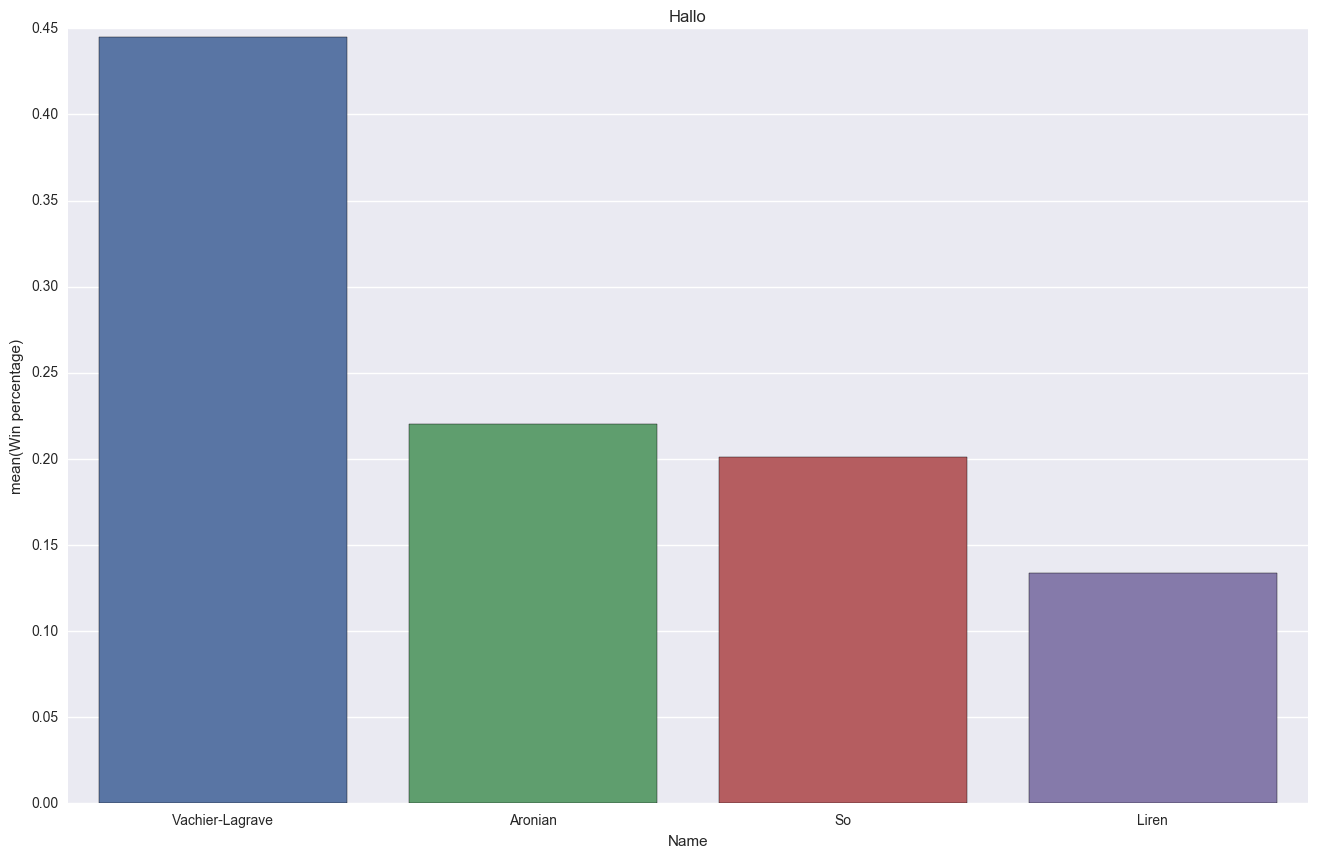

In [210]:
wc.plot_results("Hallo")

In [366]:
wc.matches("Wesley So", "Levon Aronian", 10000)

Wesley So (2792) 0.3688
Levon Aronian (2802) 0.6312


In [299]:
wc.player_dict["Levon Aronian"]

Levon Aronian (2802)

In [14]:
import tournament

In [282]:
wc.players[0].current_score

In [95]:
from tournament import WorldCup, Cup, Tournament

In [165]:
wc.players[0].scores

{'Classical': {'Ding Liren': [3, 1, 4],
  'Levon Aronian': [5, 4, 13],
  'Maxime Vachier-Lagrave': [0, 0, 0],
  'Wesley So': [4, 1, 9]},
 'RapidBlitz': {'Ding Liren': [2, 0, 0],
  'Levon Aronian': [6, 2, 9],
  'Maxime Vachier-Lagrave': [0, 0, 0],
  'Wesley So': [10, 2, 15]}}